<a href="https://colab.research.google.com/github/AhmadJamal01/Floodead-Inside/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from osgeo import gdal

## Read the data

In [2]:
!pip install gdal > /dev/null

In [ ]:
import gdown
gdown.download("https://drive.google.com/uc?id=1och-QmNa3FAiS-wssgzCwISbmpSezIi_", "dataset.zip", quiet=False)
gdown.extractall("dataset.zip")

In [4]:
df = pd.DataFrame(columns=['image_path', 'label'])

for image_path in sorted(glob.glob('dataset/flooded/*.jpg')):
    data = {'image_path': image_path, 'label': 'flooded'}
    df.loc[len(df)] = data

for image_path in sorted(glob.glob('dataset/non-flooded/*.jpg')):
    data = {'image_path': image_path, 'label': 'non-flooded'}
    df.loc[len(df)] = data

## EDA

### Dataset Overview

In [8]:
# Display the first few rows of the dataset
print(df.head())

# Check the dimensions of the dataset (number of rows, number of columns)
print("Dataset shape:", df.shape)

# Check for missing values
print("Missings Count", df.isnull().sum())



                image_path    label
0    dataset/flooded/0.jpg  flooded
1    dataset/flooded/1.jpg  flooded
2   dataset/flooded/10.jpg  flooded
3  dataset/flooded/100.jpg  flooded
4  dataset/flooded/101.jpg  flooded
Dataset shape: (922, 2)
Missings Count image_path    0
label         0
dtype: int64


### classes distribution

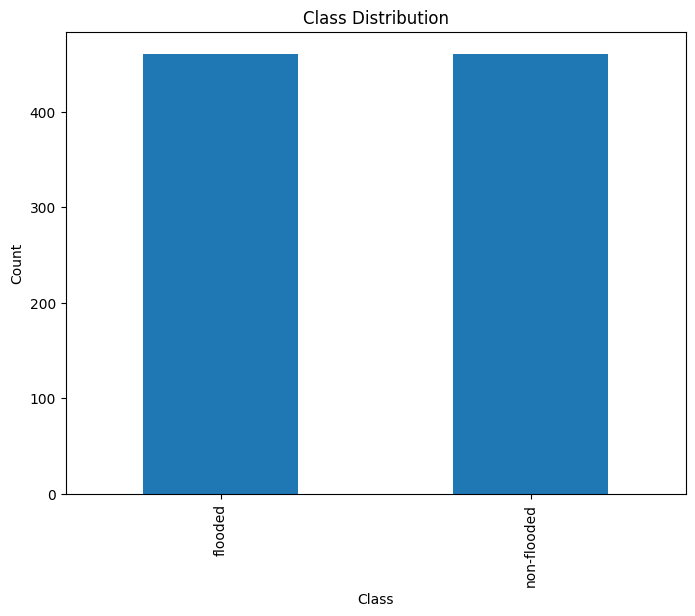

In [7]:
import matplotlib.pyplot as plt

# Print Class Distribution
print("Total number of instances in the dataset", len(df))
print("Total number of flooded instances in the dataset", len(df[df['label'] == 'flooded']))
print("Total number of non-flooded instances in the dataset", len(df[df['label'] == 'non-flooded']))

# Count the number of samples in each class
class_counts = df['label'].value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Sample image visualization

In [10]:
import cv2

# Randomly select a few sample images
sample_images = df.sample(n=4)

# Display the sample images
plt.figure(figsize=(10, 10))
for i, (_, row) in enumerate(sample_images.iterrows()):
    image = cv2.imread(row['image_path'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(row['label'])
plt.show()


KeyboardInterrupt: ignored

### Image statistics and properties

In [11]:
# Compute image statistics (mean, standard deviation) for further analysis
image_stats = []
for _, row in df.iterrows():
    image = cv2.imread(row['image_path'])
    image_stats.append(image.mean(axis=(0, 1)))

image_stats = pd.DataFrame(image_stats, columns=['Red', 'Green', 'Blue'])
print("Image Statistics:")
print(image_stats.describe())


Image Statistics:
              Red       Green        Blue
count  922.000000  922.000000  922.000000
mean   115.954649  117.000217  102.267569
std     28.291652   26.237876   28.510193
min     35.726889   41.423950   26.471636
25%    101.062540  101.448852   85.816433
50%    117.331860  117.185117  102.884859
75%    133.805298  132.525689  119.731043
max    221.244049  221.544763  215.234698
